Interactive 3D plt to show sin/cos part of the euler identity of complex numbers.
(Currently only working in jupyter notebook environment, not VSCode!)

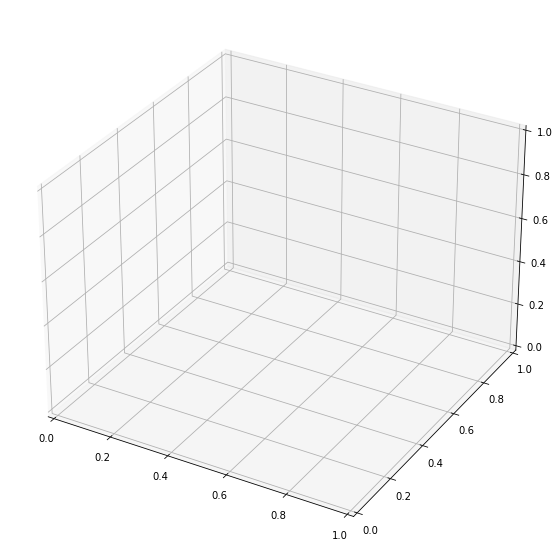

interactive(children=(FloatSlider(value=1.0, description='sin_freq', layout=Layout(width='500px'), max=12.5663…

In [3]:
%matplotlib notebook 
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, Layout

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# control frequency of sin/cos
sin_freq = 1.0
cos_freq = 1.0

# control amplitude of sin/cos
sin_amp = 1.0
cos_amp = 1.0

# control phase of sin/cos
sin_phase = 1.0
cos_phase = 1.0


# x to plot
z = np.linspace(0, 8 * np.pi, 200)
plt.show()

def update(sin_freq = 1.0, cos_freq = 1.0, sin_amp = 1.0, cos_amp = 1.0, sin_phase = 0.0, cos_phase = 0.0):
    ax.clear()
    # imaginary part Im(z)
    y = sin_amp * np.sin(sin_freq*z + sin_phase)
    # real part Re(z)
    x = cos_amp * np.cos(cos_freq*z + cos_phase)
    ax.set_xlabel('$cos(k)$')
    #ax.set_xticks(np.arange(min(x),max(x)+1, max(x)/4))
    ax.set_ylabel('$sin(k)$')
    #ax.set_yticks(np.arange(min(y),max(y)+1, max(y)/4))
    ax.set_zlabel('$x$')
    #ax.set_zticks(np.arange(min(z),max(z)+1, 5))
    ax.plot(x, y, z, label='$e^{2\pi i x}$')
    ax.legend()
    fig.canvas.draw_idle()
    
sin_freq_slider = FloatSlider(1, min=-1.0, max=4*np.pi, layout=Layout(width='500px'))
cos_freq_slider = FloatSlider(1, min=-1.0, max=4*np.pi, layout=Layout(width='500px'))
sin_amp_slider = FloatSlider(1, min=-1.0, max=4*np.pi, layout=Layout(width='500px'))
cos_amp_slider = FloatSlider(1, min=-1.0, max=4*np.pi, layout=Layout(width='500px'))
sin_phase_slider = FloatSlider(0, min=-1.0, max=4*np.pi, layout=Layout(width='500px'))
cos_phase_slider = FloatSlider(0, min=-1.0, max=4*np.pi, layout=Layout(width='500px'))
interactive(update, 
            sin_freq = sin_freq_slider, 
            cos_freq = cos_freq_slider, 
            sin_amp = sin_amp_slider, 
            cos_amp = cos_amp_slider, 
            sin_phase = sin_phase_slider, 
            cos_phase = cos_phase_slider, 
            )

Complex plane in 3D (showing unit circle)

<IPython.core.display.Javascript object>


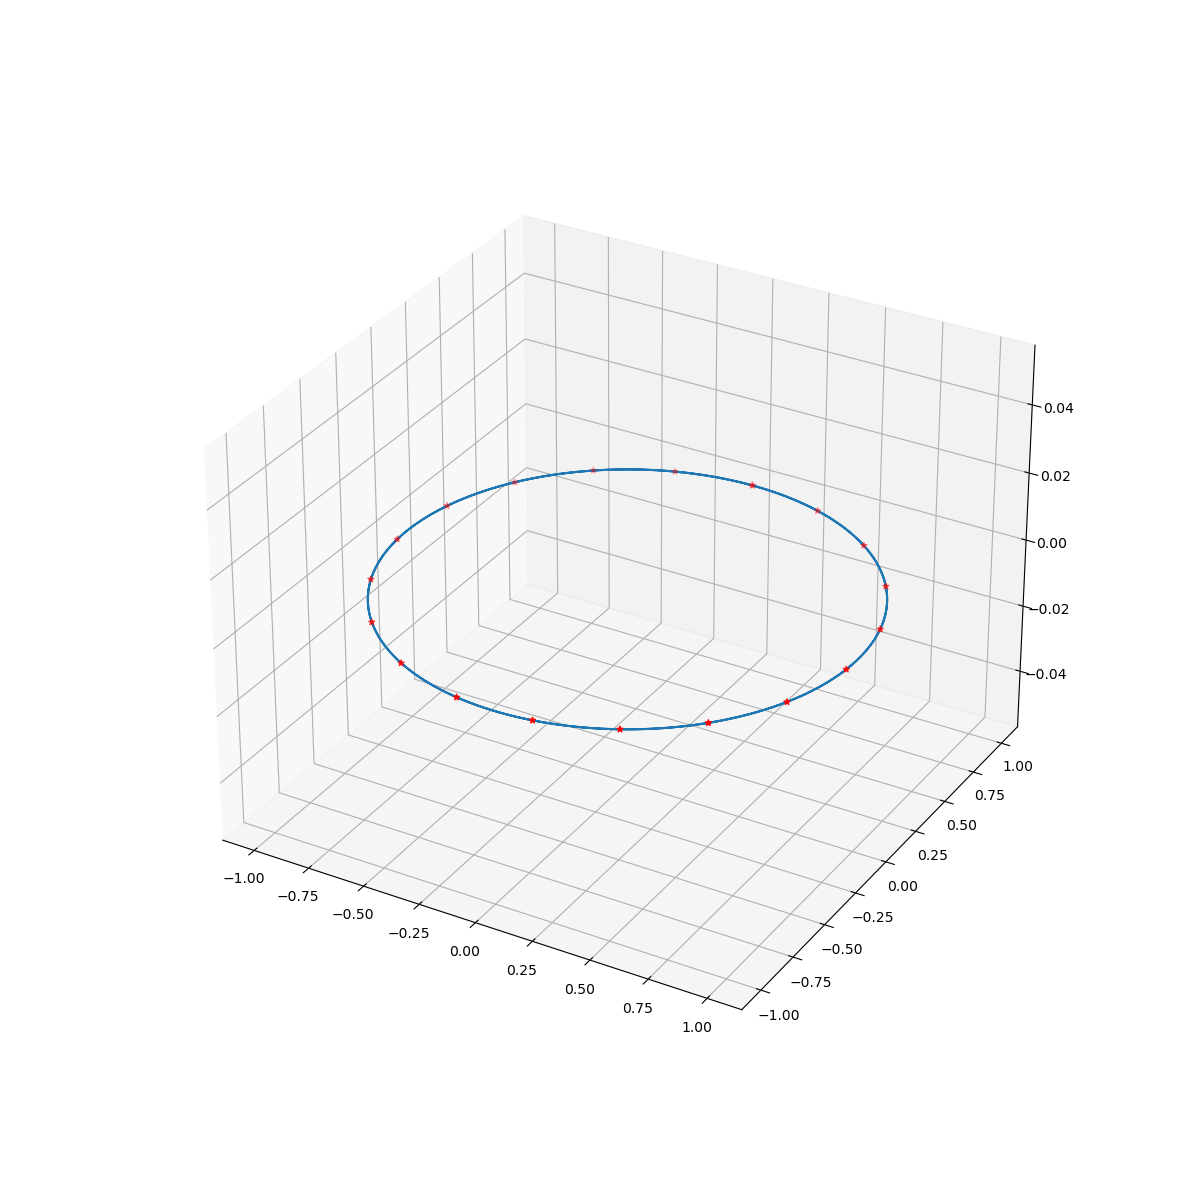

In [49]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# flat: 0=flat, 1=3D
flat = 0
N = 2


z = np.linspace(0, N * 2* np.pi, 200)
x = np.sin(z)
y = np.cos(z)
ax.plot(x, y, flat*z, label='$e^{2\pi i x}$')

n = 20

z_discrete = np.linspace(0, N * 2 * np.pi, n)
x_discrete = np.sin(z_discrete)
y_discrete = np.cos(z_discrete)
ax.scatter(x_discrete, y_discrete, flat*z_discrete, color='r', marker='*')

plt.show()

Phase change on complex plane.

<IPython.core.display.Javascript object>


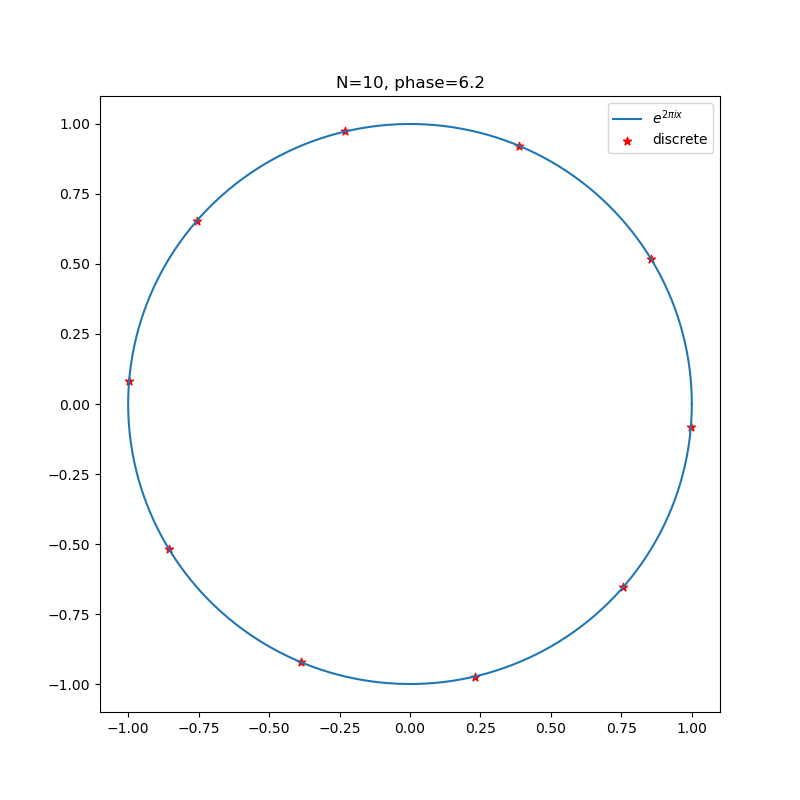

interactive(children=(FloatSlider(value=0.0, description='phase', max=6.283185307179586), IntSlider(value=10, …

In [57]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

circle = np.exp(1j * np.linspace(0, 2* np.pi, 200))

ax.plot(np.real(circle), np.imag(circle), label='$e^{2\pi i x}$')

N = 10
k = 2
x = np.arange(N)
phase = 0.0

points = np.exp(1j * (2* np.pi * (x * (k / N)) + phase))
markers = ax.scatter(np.real(points), np.imag(points), color='r', marker='*', label=f'discrete')
plt.legend()
plt.show()

def update(phase=0.0, N=10):
    x = np.arange(N)
    points = np.exp(1j * (2* np.pi * (x / N) + phase))
    markers.set_offsets(np.c_[np.real(points), np.imag(points)])
    ax.set_title(f"N={N}, phase={phase}")
    fig.canvas.draw()
    
slider = FloatSlider(0, min=0, max=2*np.pi)
interactive(update, phase=slider, N=(1,10))